In [2]:
import numpy as np
import matplotlib.pyplot as plt

The goal here is to figure out just how many atoms we really can expect to have individually addressable if they follow a gaussian distribution

# Test the tools

In [20]:
def gauss(x, mu, s, a, b):
    return a * np.exp(-(mu-x)**2 / (2*s**2)) + b

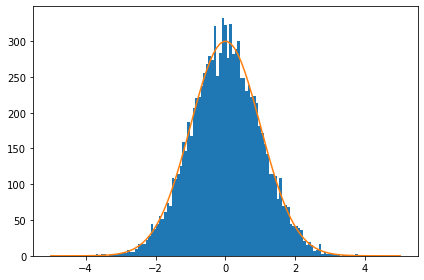

In [25]:
test = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots(1,1)

ax.hist(test, bins=100)

x = np.linspace(-5, 5, 100)
ax.plot(x, gauss(x, *[0, 1, 300, 0]))

plt.tight_layout()

In [ ]:
[1,2,3,4,4,4, 5, 6]
[True, True, True, False, False, True, True]

In [85]:
arr = [1, 2, 3, 4, 4, 5, 6, 6, 7]
diff_right = np.diff(arr, append=np.inf)
diff_right

array([ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  1., inf])

In [88]:
diff_left = np.diff(arr, prepend=-1*np.inf)
diff_left

array([inf,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.])

In [96]:
diff_left = np.concatenate([[np.inf], diff_right[:-1]])
diff_left

array([inf,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.])

In [97]:
is_isolated = [min(left, right) > 0.5 for left, right in zip(diff_left, diff_right)]
is_isolated

[True, True, True, False, False, True, False, False, True]

In [98]:
np.count_nonzero(is_isolated)

5

# MC simulation

In [109]:
def num_dist(w_h, w_in, num):
    """ This may be off by 1 for now, if they are all separate it will return num-1"""
    ions = np.random.normal(0, w_in, num)
    ions_sorted = sorted(ions)
#     ion_spacing = np.diff(ions_sorted)
#     is_isolated = list(ion_spacing > w_h)
#     num_isolated = is_isolated.count(True)

    spacing_right = np.diff(ions_sorted, append=np.inf)
    spacing_left = np.concatenate([[np.inf], spacing_right[:-1]])
    is_isolated = [min(left, right) > w_h for left, right in zip(spacing_left, spacing_right)]
    num_isolated = np.count_nonzero(is_isolated)

    return num_isolated
    

def avg_dist(num_trials, w_h, w_in, num):
    num_dist_arr = [num_dist(w_h, w_in, num) for i in range(num_trials)]
    return np.mean(num_dist_arr), np.std(num_dist_arr)
        

In [123]:
w_in = 2e3 # in MHz
sig_inh = w_in / (2*np.sqrt(2*np.log(2)))
num_sims = 100
num_ions = np.logspace(0, 5, 10).astype(int)

desired_spacing = [1, 3, 10, 30, 100]
num_arr = []
std_arr = []
for spacing in desired_spacing:    
    mc_result = np.array([avg_dist(num_sims, spacing, sig_inh, num) for num in num_ions])
    num_usable = mc_result[:,0]
    std_usable = mc_result[:,1]
    num_arr.append(num_usable)
    std_arr.append(std_usable)

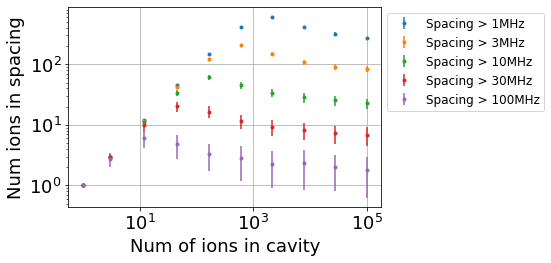

In [133]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,1, figsize=(8,4))

for num_usable, std_usable, spacing in zip(num_arr, std_arr, desired_spacing):
    ax.errorbar(num_ions, num_usable, yerr=std_usable, fmt='.', label='Spacing > %iMHz' %spacing)

ax.set_xlabel('Num of ions in cavity')
ax.set_ylabel('Num ions in spacing')

ax.set_xscale('log')
ax.set_yscale('log')

ax.grid()

ax.legend(bbox_to_anchor=(1,1), fontsize=12)

plt.tight_layout()

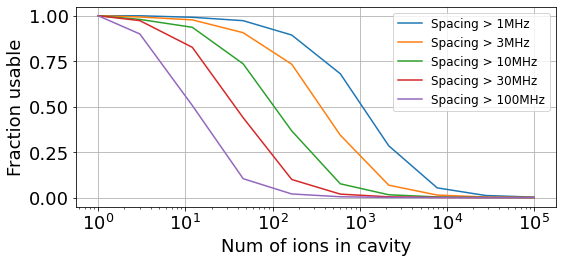

In [139]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,1, figsize=(8,4))

for num_usable, std_usable, spacing in zip(num_arr, std_arr, desired_spacing):
    ax.plot(num_ions, [usable/total for usable, total in zip(num_usable, num_ions)], label='Spacing > %iMHz' %spacing)

ax.set_xlabel('Num of ions in cavity')
ax.set_ylabel('Fraction usable')

ax.set_xscale('log')
ax.set_yscale('linear')

ax.grid()

ax.legend(bbox_to_anchor=(1,1), fontsize=12)

plt.tight_layout()